<a href="https://colab.research.google.com/github/projet-ML/projet/blob/master/Detection_de_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
!pip install scikit-plot
import pandas as pd 
from wordcloud import WordCloud 
from wordcloud import STOPWORDS 
import nltk 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt 
import seaborn as sns 
import scikitplot as skplt #
from sklearn.model_selection import train_test_split 

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer 


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 



#import methods
from sklearn.naive_bayes import MultinomialNB 
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.neural_network import MLPClassifier
#from xgboost import XGBClassifier

# **READ AND SHOW DATA**

In [56]:
import urllib.request
import os
#data_path = os.path.join("master", "")
#data_path = os.path.join("master", "")
#download_path = "https://raw.githubusercontent.com/projet-ML/projet/master/"
#os.makedirs(data_path, exist_ok=True)
#for filename in ("spam.csv"):
#print("Downloading", "spam.csv")
#url = download_path + "spam.csv"
#urllib.request.urlretrieve(url, data_path+"spam.csv")

#from google.colab import files # Use to load data on Google Colab
#uploaded = files.upload() # Use to load data on Google Colab

#df = pd.read_csv("spam.csv", thousands=',', sep='delimiter', encoding = 'latin-1', engine='python')
#df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
#df.columns = ['Label', 'Message']

!gdown https://drive.google.com/uc?id=1XZcHqqnP_ryY7F6-B2ZuA_6w5ReFGV5H
df = pd.read_table('SMSSpamCollection',
                   sep='\t', 
                   header=None, 
                   names=['Label', 'Message']) 
df.head()

# Output printing out first 5 columns
#df.head()

#remote = pd.read_csv(data_path+"spam.csv", thousands=',', sep='delimiter', encoding = 'latin-1', engine='python')
#df = pd.read_table(data_path+"spam.csv",
                 #  sep='\t', 
                 #  header=None, 
                  # names=['Label', 'Message'])
 
#remote.shape
#df = pd.read_csv("https://github.com/projet-ML/projet/blob/master/spam.csv", thousands=',' , encoding = 'latin-1')

Downloading...
From: https://drive.google.com/uc?id=1XZcHqqnP_ryY7F6-B2ZuA_6w5ReFGV5H
To: /content/SMSSpamCollection
100% 478k/478k [00:00<00:00, 63.2MB/s]


,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."



# **Splitting the labels and the data separately**

In [57]:
df_labels = df['Label']
df_labels.head(11)

0      ham
1      ham
2     spam
3      ham
4      ham
5     spam
6      ham
7      ham
8     spam
9     spam
10     ham
Name: Label, dtype: object

# **Data Visualization**
- To check the most used word in Ham sms and Spam SMS
- To visualize the percentage of Ham and Spam SMS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


				 HAM WORDS


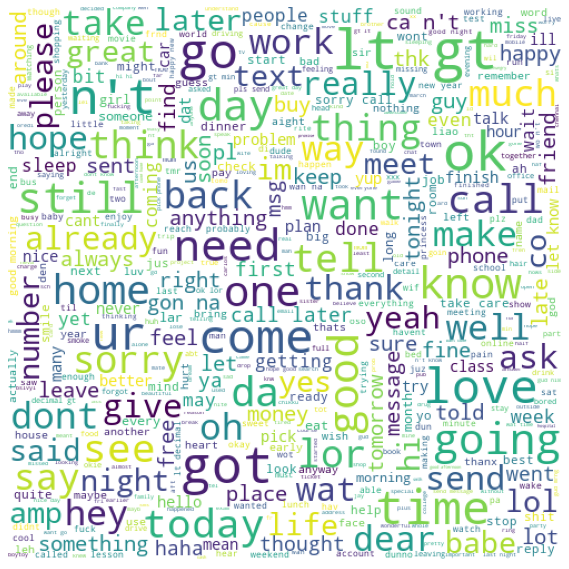

				 SPAM WORDS


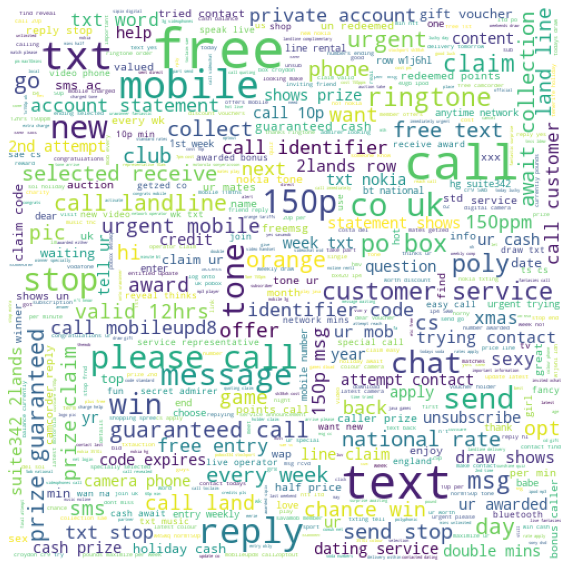

In [58]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stopwords = STOPWORDS
stopwords = list(stopwords)
STOPWORDS = nltk.corpus.stopwords.words('english')
stopwords = stopwords + STOPWORDS

ham_dataset = df[df.Label == 'ham']
spam_dataset = df[df.Label == 'spam']
ham_words = ' '
spam_words = ' '

for words in ham_dataset.Message:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        ham_words = ham_words + word + " "
for words in spam_dataset.Message:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        spam_words = spam_words + word + " "

def gen_wordcloud(wordcloud):
    plt.figure(figsize = (10,8))
    plt.imshow(wordcloud)
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()
    
print("\n")    
print("\t\t\t\t HAM WORDS")    
wordcloud = WordCloud(background_color = 'white', width = 500, height = 500, stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42).generate(ham_words)
gen_wordcloud(wordcloud)

print("\t\t\t\t SPAM WORDS")
wordcloud = WordCloud(background_color = 'white', width = 500, height = 500, stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42).generate(spam_words)
gen_wordcloud(wordcloud)

# **Plotting ham and spam data % in pie chart**

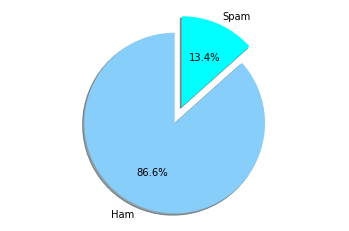

In [59]:
count_Class = pd.value_counts(df.Label, sort = True)

# Data to Plot
labels = 'Ham', 'Spam'
sizes = [count_Class[0], count_Class[1]]
colors = ['lightskyblue', 'aqua']
explode = (0.1, 0.1)

# Plot
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()


# **Splitting the Test and Train Data**

In [60]:
train_set, test_set, train_label, test_label = train_test_split(df, df_labels, test_size = 0.33, random_state = 42)
print(train_set.shape)
print(test_set.shape)
print("\nThe Trainset consists of {} records and {} features".format(train_set.shape[0],train_set.shape[1]))
print("\nThe Testset consists of {} records and {} features".format(test_set.shape[0],train_set.shape[1]))

(3733, 2)
(1839, 2)

The Trainset consists of 3733 records and 2 features

The Testset consists of 1839 records and 2 features


# **Extracting N-grams from the Text Data**

In [0]:
countvect = CountVectorizer(ngram_range = (2,2), )
x_counts = countvect.fit(train_set.Message)

# preparing for training set
x_train_df = countvect.transform(train_set.Message)

# preparing for test set
x_test_df = countvect.transform(test_set.Message)

# **Data Model**
The Algorithms used below in this notebooks are:

- Naive Bayes
- K-Nearest
- Decision Tree
- Support Vector Machine
- Random Forest
- Logistic regression

**Naive Bayes classifier**

The accuracy of Naive Bayes clasifier is 98.31430125067972%

 [[1589    4]
 [  27  219]]


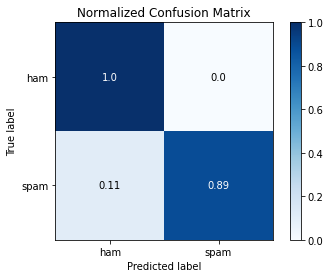

In [62]:
clf = MultinomialNB()
clf.fit(x_train_df,train_set.Label)
predicted_values_NB = clf.predict(x_test_df)
predictions = dict()
accuracy = accuracy_score(test_set.Label, predicted_values_NB)
predictions['Naive Bayes'] = accuracy * 100
confusionmatrix = confusion_matrix(test_set.Label, predicted_values_NB)
print("The accuracy of Naive Bayes clasifier is {}%".format(accuracy * 100))
print("\n", confusionmatrix)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_NB, normalize = True)
plt.show()

**K-Nearest Neighbors algorithm**

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']

The accuracy of K-Nearest Neighbors algorithm is 89.28765633496467%

 [[1593    0]
 [ 197   49]]


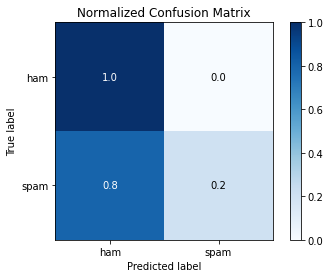

In [63]:
KNN = KNeighborsClassifier()
KNN.fit(x_train_df, train_set.Label)
predicted_values_KNN = KNN.predict(x_test_df)
print(predicted_values_KNN)
accuracy_KNN = accuracy_score(test_set.Label, predicted_values_KNN)
predictions['K-Nearest Neighbors algorithm'] = accuracy_KNN * 100
print("\nThe accuracy of K-Nearest Neighbors algorithm is {}%".format(accuracy_KNN * 100))
confusion_matrix_KNN = confusion_matrix(test_set.Label, predicted_values_KNN)
print("\n", confusion_matrix_KNN)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_KNN, normalize = True)
plt.show()

**Decision Tree learning**

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']

The accuracy of Decision Tree learning is 97.17237629146275%

 [[1587    6]
 [  46  200]]


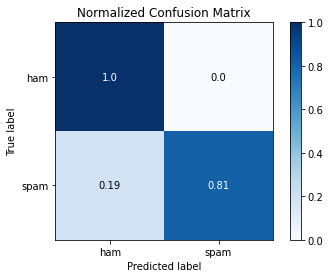

In [64]:
DT = DecisionTreeClassifier()
DT.fit(x_train_df, train_set.Label)
predicted_values_DT = DT.predict(x_test_df)
print(predicted_values_DT)
accuracy_DT = accuracy_score(test_set.Label, predicted_values_DT)
predictions['Decision Tree learning'] = accuracy_DT * 100
print("\nThe accuracy of Decision Tree learning is {}%".format(accuracy_DT * 100))
confusion_matrix_DT = confusion_matrix(test_set.Label, predicted_values_DT)
print("\n", confusion_matrix_DT)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_DT, normalize = True)
plt.show()

**Support Vector Machine (SVM)**

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']

The accuracy of Support Vector Machine (SVM) is 94.67101685698749%

 [[1593    0]
 [  98  148]]


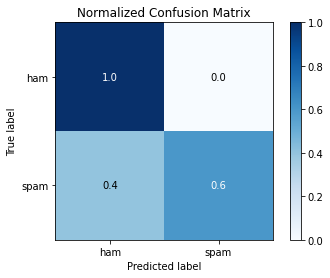

In [65]:
SVM = svm.SVC()
SVM.fit(x_train_df, train_set.Label)
predicted_values_SVM = SVM.predict(x_test_df)
print(predicted_values_SVM)
accuracy_SVM = accuracy_score(test_set.Label, predicted_values_SVM)
predictions['Support Vector Machine (SVM)'] = accuracy_SVM * 100
print("\nThe accuracy of Support Vector Machine (SVM) is {}%".format(accuracy_SVM * 100))
confusion_matrix_SVM = confusion_matrix(test_set.Label, predicted_values_SVM)
print("\n", confusion_matrix_SVM)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_SVM, normalize = True)
plt.show()


**Random Forest**

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']

The accuracy of Random Forest is 96.51984774333877%

 [[1593    0]
 [  64  182]]


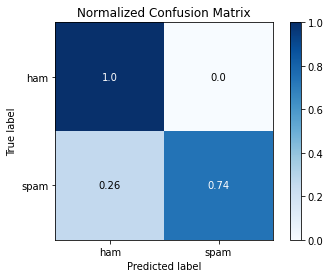

In [66]:
RF = RandomForestClassifier(n_estimators = 100, oob_score = True, random_state = 123456)
RF.fit(x_train_df, train_set.Label)
predicted_values_RF = RF.predict(x_test_df)
print(predicted_values_RF)
accuracy_RF = accuracy_score(test_set.Label, predicted_values_RF)
predictions['Random Forest'] = accuracy_RF * 100
print("\nThe accuracy of Random Forest is {}%".format(accuracy_RF * 100))
confusion_matrix_RF = confusion_matrix(test_set.Label, predicted_values_RF)
print("\n", confusion_matrix_RF)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_RF, normalize = True)
plt.show()


**Logistic Regression**


['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']

Logistic Regression (LR) is 95.64980967917346%

 [[1593    0]
 [  80  166]]


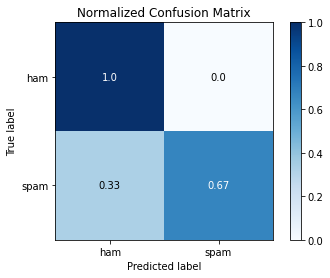

In [67]:
from sklearn.linear_model import LogisticRegression
LR = DT = LogisticRegression()
LR.fit(x_train_df, train_set.Label)
predicted_values_LR = LR.predict(x_test_df)
print(predicted_values_LR)
accuracy_LR = accuracy_score(test_set.Label, predicted_values_LR)
predictions['Logistic Regression (LR)'] = accuracy_LR * 100
print("\nLogistic Regression (LR) is {}%".format(accuracy_LR * 100))

confusion_matrix_LR = confusion_matrix(test_set.Label, predicted_values_LR)
print("\n", confusion_matrix_LR)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_LR, normalize = True)
plt.show()


**Method Comparison**

,Algorithms,Percentage
0,Naive Bayes,98.314301
1,K-Nearest Neighbors algorithm,89.287656
2,Decision Tree learning,97.172376
3,Support Vector Machine (SVM),94.671017
4,Random Forest,96.519848
5,Logistic Regression (LR),95.649810


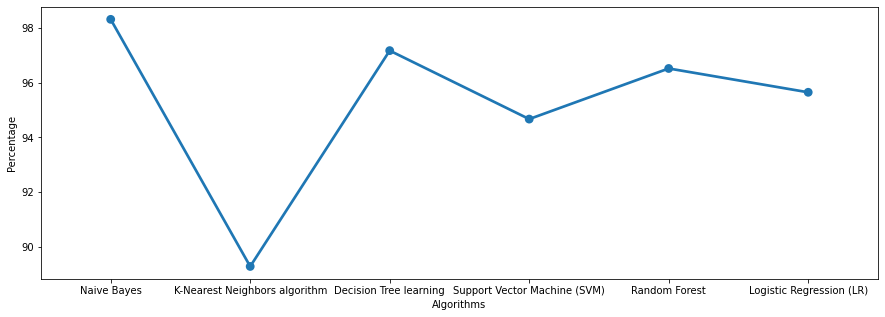

In [68]:
fig, (ax1) = plt.subplots(ncols = 1, sharey = True,figsize = (15,5))
df = pd.DataFrame(list(predictions.items()),columns = ['Algorithms','Percentage'])
display(df)
sns.pointplot(x = "Algorithms", y = "Percentage", data = df,ax = ax1);


**ROC Accuracy**

In [69]:
test_prediction = test_set.Label.tolist()
predicted_values = predicted_values_NB.tolist()
test_prediction = [1 if pred=="spam" else 0 for pred in test_prediction]
predicted_values = [1 if pred=="spam" else 0 for pred in predicted_values]
fpr, tpr, thresholds = roc_curve(test_prediction,predicted_values)
roc_auc = auc(fpr, tpr)
print("The ROC Accuracy is {}".format(roc_auc))

The ROC Accuracy is 0.9438664584385956


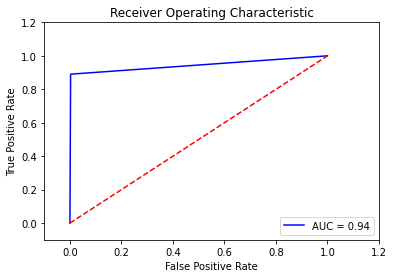

In [70]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Neural Network**


In [71]:
!gdown https://drive.google.com/uc?id=1XZcHqqnP_ryY7F6-B2ZuA_6w5ReFGV5H
df = pd.read_table('SMSSpamCollection',
                   sep='\t', 
                   header=None, 
                   names=['Label', 'Message']) 
df.head()
df["Label_tag"] = df.Label.map({'ham':0, 'spam':1})
df.head(5)

Downloading...
From: https://drive.google.com/uc?id=1XZcHqqnP_ryY7F6-B2ZuA_6w5ReFGV5H
To: /content/SMSSpamCollection
100% 478k/478k [00:00<00:00, 69.3MB/s]


,Label,Message,Label_tag
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [72]:
# get the size of our dataset
print(df.count())
df.Label_tag.value_counts()

Label        5572
Message      5572
Label_tag    5572
dtype: int64


0    4825
1     747
Name: Label_tag, dtype: int64

In [73]:
#Data Preparation
##Training data
# first 4572/5572 emails
training_data = df[0:4572]
training_data_length = len(training_data.Label)
training_data.head()

,Label,Message,Label_tag
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [74]:
#Testing data
test_data = df[-1000:]
test_data_length = len(test_data.Label)
test_data.head()


,Label,Message,Label_tag
4572,ham,"CHA QUITEAMUZING THATSCOOL BABE,PROBPOP IN & ...",0
4573,ham,Omg how did u know what I ate?,0
4574,spam,URGENT! This is the 2nd attempt to contact U!U...,1
4575,ham,:( but your not here....,0
4576,ham,Not directly behind... Abt 4 rows behind ü...,0


In [75]:
#What is the shape of our input data
print(training_data.shape)
print(training_data.Label.shape)

(4572, 3)
(4572,)


In [76]:
#There are 3 features and 4572 samples in our trtaining set

#Test data
print(test_data.shape)
print(test_data.Label.shape)


(1000, 3)
(1000,)


In [77]:
#Develop a Predictive Theory
import random
print("labels \t : \t texts\n")
def pretty_print_Message_and_Label(i):
    print(training_data.Label[i] + "\t:\t" + training_data.Message[i][:80] + "...")
# choose  a random spam set to analyse
# random.randrange(start, stop, step)
pretty_print_Message_and_Label(random.randrange(0,4572))
pretty_print_Message_and_Label(random.randrange(0,4572,4))
pretty_print_Message_and_Label(random.randrange(0,4572,50))
pretty_print_Message_and_Label(random.randrange(0,4572,100))
pretty_print_Message_and_Label(random.randrange(0,4572,200))
pretty_print_Message_and_Label(random.randrange(0,4572,500))
pretty_print_Message_and_Label(random.randrange(0,4572,800))
pretty_print_Message_and_Label(random.randrange(0,4572,1000))

labels 	 : 	 texts

ham	:	Squeeeeeze!! This is christmas hug.. If u lik my frndshp den hug me back.. If u ...
spam	:	U have a Secret Admirer who is looking 2 make contact with U-find out who they R...
ham	:	You might want to pull out more just in case and just plan on not spending it if...
ham	:	Gimme a few was  &lt;#&gt;  minutes ago...
ham	:	Gimme a few was  &lt;#&gt;  minutes ago...
spam	:	SMS. ac JSco: Energy is high, but u may not know where 2channel it. 2day ur lead...
ham	:	K...k...when will you give treat?...
ham	:	K...k...when will you give treat?...


In [0]:
#It is very easy to distinguish a spam text from a non-spam text (in this case ham) . 
#Spam text occasionaly contain words like free, sell, promotion, deal, offer, discount, lucky e.t.c. 
#This way we can let our network learn some of the words assocaiated with spams and based on such criteria we can classify a text as a spam or not.



In [0]:
#Theory Validation

In [79]:
from collections import Counter
import numpy as np
import pprint
spam_counts = Counter()
ham_counts = Counter()
total_counts = Counter()
spam_ham_ratios = Counter()

pp = pprint.PrettyPrinter(indent=4)

for i in range(training_data_length):
    if(training_data.Label[i] == 0):
        for word in training_data.Message[i].split(" "):
            ham_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in training_data.Message[i].split(" "):
            spam_counts[word] += 1
            total_counts[word] += 1

pp.pprint(spam_counts.most_common()[0:30])

[   ('to', 1768),
    ('you', 1372),
    ('I', 1206),
    ('a', 1104),
    ('the', 998),
    ('and', 737),
    ('is', 655),
    ('in', 653),
    ('i', 615),
    ('u', 569),
    ('for', 533),
    ('my', 524),
    ('', 520),
    ('of', 499),
    ('me', 468),
    ('your', 448),
    ('on', 411),
    ('have', 403),
    ('2', 374),
    ('that', 359),
    ('are', 328),
    ('it', 314),
    ('or', 304),
    ('call', 303),
    ('at', 301),
    ('be', 300),
    ('not', 295),
    ('with', 283),
    ('get', 270),
    ('will', 267)]


In [80]:
for word,count in list(total_counts.most_common()):
    if(count > 100):
        spam_ham_ratio = spam_counts[word] / float(ham_counts[word]+1)
        spam_ham_ratios[word] = spam_ham_ratio

for word,ratio in spam_ham_ratios.most_common():
    if(ratio > 1):
        spam_ham_ratios[word] = np.log(ratio)
    else:
        spam_ham_ratios[word] = -np.log((1 / (ratio+0.01)))


# words most frequently seen in a text with a "spam" label
pp.pprint(spam_ham_ratios.most_common()[0:30])

[   ('to', 7.477604243197589),
    ('you', 7.22402480828583),
    ('I', 7.095064377287131),
    ('a', 7.00669522683704),
    ('the', 6.905753276311464),
    ('and', 6.602587892189336),
    ('is', 6.484635235635252),
    ('in', 6.481577129276431),
    ('i', 6.421622267806518),
    ('u', 6.343880434126331),
    ('for', 6.278521424165844),
    ('my', 6.261491684321042),
    ('', 6.253828811575473),
    ('of', 6.212606095751519),
    ('me', 6.148468295917647),
    ('your', 6.104793232414985),
    ('on', 6.018593214496234),
    ('have', 5.998936561946683),
    ('2', 5.924255797414532),
    ('that', 5.883322388488279),
    ('are', 5.793013608384144),
    ('it', 5.749392985908253),
    ('or', 5.717027701406222),
    ('call', 5.713732805509369),
    ('at', 5.707110264748875),
    ('be', 5.703782474656201),
    ('not', 5.68697535633982),
    ('with', 5.645446897643238),
    ('get', 5.598421958998375),
    ('will', 5.58724865840025)]


In [0]:
#We are going to use the count of words as the input to our neural network. 
#The vocab_vector will have columns for all the words in our training data in the form of {key: value} 
#i.e {word: count} as held by the word_column_dict python Dictionary. 
#The individual word counts in any particular text is updated from 0 to a number based on a word's total count in any single text.

#This means that the words with a higher count might have a higher weight in determining whether a text is a spam or not.



In [81]:
def update_input_layer(text):
    pp.pprint(text)
    global vocab_vector
    
    # clear out previous state, reset the vector to be all 0s
    vocab_vector *= 0
    for word in text.split(" "):
        vocab_vector[0][word_column_dict[word]] += 1

update_input_layer(training_data["text"][random.randrange(0,4572,4)])

KeyError: ignored

In [0]:
#Build the SpamClassificationNeuralNetwork
import time
import sys
# Let's tweak our network from before to model these phenomena
class SpamClassificationNeuralNetwork(object):
    def __init__(self, training_data, num_hidden_nodes = 10, num_epochs = 10, learning_rate = 0.1):
        # set our random number generator 
        np.random.seed(1)
        # pre-process data
        self.pre_process_data(training_data)
        
        self.num_features = len(self.vocab)
        self.vocab_vector = np.zeros((1, len(self.vocab)))
        self.num_input_nodes = self.num_features
        self.num_hidden_nodes = num_hidden_nodes
        self.num_epochs = num_epochs
        self.num_output_nodes = 1
        self.learning_rate = learning_rate

        # Initialize weights
        self.weights_i_h = np.random.randn(self.num_input_nodes, self.num_hidden_nodes)
        self.weights_h_o = np.random.randn(self.num_hidden_nodes, self.num_output_nodes)
        
    def forward_backward_propagate(self, Message, Label):
        ### Forward pass ###
        # Input Layer
        self.update_input_layer(Message)
        # Hidden layer
        hidden_layer = self.vocab_vector.dot(self.weights_i_h)
        # Output layer
        output_layer = self.sigmoid(hidden_layer.dot(self.weights_h_o))
        
        ### Backward pass ###
        # Output error
        output_layer_error = output_layer - Label 
        output_layer_delta = output_layer_error * self.sigmoid_derivative(output_layer)
         # Backpropagated error - to the hidden layer
        hidden_layer_error = output_layer_delta.dot(self.weights_h_o.T)
        # hidden layer gradients - no nonlinearity so it's the same as the error
        hidden_layer_delta = output_layer_error 

        # update the weights - with grdient descent
        self.weights_h_o -= hidden_layer.T.dot(output_layer_delta) * self.learning_rate 
        self.weights_i_h -= self.vocab_vector.T.dot(hidden_layer_delta) * self.learning_rate 
        
        if(np.abs(output_layer_error) < 0.5):
                self.correct_so_far += 1
        
        
    
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_derivative(self,x):
        return x * (1 - x)

        
    def train(self):
        for epoch in range(self.num_epochs):
            self.correct_so_far = 0
            start = time.time()
            for i in range(len(training_data)):
                # Forward and Back Propagation
                self.forward_backward_propagate(training_data["Message"][i], training_data["Label_tag"][i])

                samples_per_second = i / float(time.time() - start + 0.001)

                sys.stdout.write("\rEpoch: "+ str(epoch)
                                 +" Progress: " + str(100 * i/float(len(training_data)))[:4] 
                                 + " % Speed(samples/sec): " + str(samples_per_second)[0:5] 
                                 + " #Correct: " + str(self.correct_so_far) 
                                 + " #Trained: " + str(i+1) 
                                 + " Training Accuracy: " + str(self.correct_so_far * 100 / float(i+1))[:4] + "%")
            print("")
        
    def pre_process_data(self, training_data):
        vocab = set()
        
        for review in training_data["Messsage"]:
            for word in review.split(" "):
                vocab.add(word)
                
        self.vocab = list(vocab)
        
        self.word_to_column = {}
        for i, word in enumerate(self.vocab):
            self.word_to_column[word] = i
            
    def update_input_layer(self, Message):
        global vocab_vector
        # clear out previous state, reset the vector to be all 0s
        self.vocab_vector *= 0
        for word in Message.split(" "):
            self.vocab_vector[0][word_column_dict[word]] += 1

nn = SpamClassificationNeuralNetwork(training_data, num_epochs = 10, learning_rate=0.01)
nn.train()

In [0]:


#from sklearn.linear_model import LinearRegression
#LinR = DT = LinearRegression()
#LinR.fit(x_train_df, train_set.Label)
#predicted_values_LinR = LinR.predict(x_test_df)
#print(predicted_values_LinR)
#accuracy_LinR = accuracy_score(test_set.Label, predicted_values_LinR)
#predictions['Linear Regression (LinR)'] = accuracy_LinR * 100
#print("\nLinear Regression (LinR) is {}%".format(accuracy_LinR * 100))

#confusion_matrix_LinR = confusion_matrix(test_set.Label, predicted_values_LinR)
#print("\n", confusion_matrix_LinR)
#skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_LinR, normalize = True)
#plt.show()
